<a href="https://colab.research.google.com/github/habiib1999/Face-Recognition/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data read and Split [Abdul rahman Habib]

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import os, sys


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
BASE = '/content/drive/MyDrive/att-database-of-faces/'
filepaths = [] # Contains the absolute paths of all the image files
for s_i in os.listdir(BASE): # The folders containing the files are labelled as s1, s2, etc
    if s_i != 'README': # There is also a README file present in the data, this must be ignored
        for filename in os.listdir(BASE + s_i):
            filepaths.append(BASE + s_i + '/' + filename)

In [5]:
images = []
for filepath in filepaths:
    images.append(cv2.imread(filepath, 0).flatten())
images = np.array(images)

In [6]:
labels = []
for i in range (40): #40 person
  for j in range(10): #images
    labels.append(i+1)
labels = np.array(labels)
print(labels)


[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
 22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27 27
 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29
 29 29 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 32 32
 32 32 32 32 32 32 32 32 33 33 33 33 33 33 33 33 33

In [7]:
trainData = []
testData = []
trainLabels = []
testLabels = []
count = 0
for image,label in zip(images,labels):
  if count % 2 == 1:
    trainData.append(image)
    trainLabels.append(label)
  else:
    testData.append(image)
    testLabels.append(label)
  count += 1 
trainData = np.array(trainData) 
testData = np.array(testData)
trainLabels = np.array(trainLabels) 
testLabels = np.array(testLabels)

In [8]:
for image in images:
  print(image)
  print("-------------------------------------------------------------------------------------------------")
for trainImg in trainData:
  print(trainImg)
for testImg in testData:
  print(testImg)   

[128 125 125 ...  45  31  30]
-------------------------------------------------------------------------------------------------
[117 115 115 ...  53  46  68]
-------------------------------------------------------------------------------------------------
[114 115 115 ...  78  85  77]
-------------------------------------------------------------------------------------------------
[117 112 115 ...  82  82  80]
-------------------------------------------------------------------------------------------------
[126 130 131 ...  43  51  48]
-------------------------------------------------------------------------------------------------
[117 114 116 ...  85  89  91]
-------------------------------------------------------------------------------------------------
[116 116 117 ...  83  76  77]
-------------------------------------------------------------------------------------------------
[131 128 126 ...  41  40  35]
--------------------------------------------------------------------------

# PCA [Ahmed Ashraf]

a. Use the pseudo code below for computing the projection matrix U. 
Define the alpha = {0.8,0.85,0.9,0.95}


In [9]:
mean=np.array([np.mean(images, axis=0)])
mean

array([[85.6175, 85.5775, 85.925 , ..., 76.87  , 75.865 , 75.2275]])

In [10]:
centered=images-mean
centered

array([[ 42.3825,  39.4225,  39.075 , ..., -31.87  , -44.865 , -45.2275],
       [ 31.3825,  29.4225,  29.075 , ..., -23.87  , -29.865 ,  -7.2275],
       [ 28.3825,  29.4225,  29.075 , ...,   1.13  ,   9.135 ,   1.7725],
       ...,
       [ 24.3825,  24.4225,  26.075 , ..., -56.87  , -44.865 , -59.2275],
       [ 19.3825,  24.4225,  20.075 , ..., -58.87  , -48.865 , -53.2275],
       [ 18.3825,  19.4225,  16.075 , ..., -56.87  , -47.865 , -41.2275]])

In [11]:
cov=np.cov(centered.T)
cov

array([[1283.65031955, 1271.88059524, 1266.10407268, ..., -153.3506015 ,
        -112.43522556,  -58.93531955],
       [1271.88059524, 1276.58044486, 1263.86296992, ..., -150.44854637,
        -110.82660401,  -58.63296366],
       [1266.10407268, 1263.86296992, 1267.87406015, ..., -148.6914787 ,
        -105.79461153,  -57.20093985],
       ...,
       [-153.3506015 , -150.44854637, -148.6914787 , ..., 2205.1760401 ,
        1934.52626566, 1786.40809524],
       [-112.43522556, -110.82660401, -105.79461153, ..., 1934.52626566,
        1978.60328321, 1841.77765664],
       [ -58.93531955,  -58.63296366,  -57.20093985, ..., 1786.40809524,
        1841.77765664, 1937.10350251]])

In [12]:
from numpy import linalg 
w,v= np.linalg.eig(cov)
eigenvalues= np.array(w)
eigenvectors=np.array(v)
print("eigenvalues= \n",eigenvalues)
print("eigenvectors= \n",eigenvectors)

eigenvalues= 
 [2.82391006e+06+0.00000000e+00j 2.06973946e+06+0.00000000e+00j
 1.09704614e+06+0.00000000e+00j ... 4.50643033e-13+2.18954528e-14j
 4.50643033e-13-2.18954528e-14j 5.85268923e-13+0.00000000e+00j]
eigenvectors= 
 [[-2.12507923e-03+0.00000000e+00j  1.46851506e-02+0.00000000e+00j
   1.99294881e-02+0.00000000e+00j ...  1.80834923e-03+2.33312373e-04j
   1.80834923e-03-2.33312373e-04j  2.55777881e-03+0.00000000e+00j]
 [-2.11276614e-03+0.00000000e+00j  1.46139383e-02+0.00000000e+00j
   2.00092007e-02+0.00000000e+00j ... -5.03570582e-05+1.44551645e-05j
  -5.03570582e-05-1.44551645e-05j  5.19630472e-05+0.00000000e+00j]
 [-2.14250419e-03+0.00000000e+00j  1.46318643e-02+0.00000000e+00j
   1.98385174e-02+0.00000000e+00j ...  1.84720820e-04+1.10770825e-06j
   1.84720820e-04-1.10770825e-06j  1.44404483e-04+0.00000000e+00j]
 ...
 [-7.04005567e-03+0.00000000e+00j -1.05610380e-02+0.00000000e+00j
   1.41636829e-02+0.00000000e+00j ... -5.84458616e-03+5.05848933e-04j
  -5.84458616e-03-5.05848

In [13]:
 # Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
print(f"Q3.g -> eigen pairs value & vector ordered:\n{eig_pairs}\n")

Streaming output truncated to the last 5000 lines.
       9.47787693e-05+4.57846776e-05j, ...,
       1.11856515e-03-2.90969793e-03j, 3.76034744e-03-7.04679109e-03j,
       8.11044986e-05-8.30101527e-04j])), (4.323679844778572e-12, array([1.01483806e-03-1.66879267e-03j, 2.43602994e-05-7.22897816e-05j,
       9.47787693e-05-4.57846776e-05j, ...,
       1.11856515e-03+2.90969793e-03j, 3.76034744e-03+7.04679109e-03j,
       8.11044986e-05+8.30101527e-04j])), (4.323013591263991e-12, array([-1.05970453e-03-2.09396770e-04j,  1.49839540e-05-2.17035652e-06j,
        3.88490395e-05-5.76439391e-05j, ...,
        6.09876843e-03-7.91288109e-03j, -7.14837183e-03+1.57338891e-04j,
        2.99620824e-03+5.50967054e-03j])), (4.323013591263991e-12, array([-1.05970453e-03+2.09396770e-04j,  1.49839540e-05+2.17035652e-06j,
        3.88490395e-05+5.76439391e-05j, ...,
        6.09876843e-03+7.91288109e-03j, -7.14837183e-03-1.57338891e-04j,
        2.99620824e-03-5.50967054e-03j])), (4.3223697874688945e-12,

In [14]:
 # Q3.h
tot = sum(eigenvalues)
explainedVriance = [(i / tot)*100 for i in sorted(eigenvalues, reverse=True)]
print(f"Q3.h -> Explained variance:\n{explainedVriance}\n") #we will take pc1 and pc2

print(sum(explainedVriance))

Q3.h -> Explained variance:
[(17.609549780232584+0j), (12.906636270754587+0j), (6.841042453498407+0j), (5.578942843348595+0j), (5.109912685183246+0j), (3.362533668951754+0j), (2.4471967498269502+0j), (2.331064364864162+0j), (1.962202178423057+0j), (1.8027805384675206+0j), (1.4389234248627665+0j), (1.3979224444748444+0j), (1.1190403195665115+0j), (1.0672741075801147+0j), (0.974647162456032+0j), (0.9136254290709758+0j), (0.8760419529135477+0j), (0.8444523749274793+0j), (0.7354906393013467+0j), (0.6953673669735072+0j), (0.670946576124103+0j), (0.638509695139224+0j), (0.5930755393578466+0j), (0.5437966318542196+0j), (0.5290913775924561+0j), (0.4935872330118419+0j), (0.4813320123099383+0j), (0.4788858546192429+0j), (0.4480262537908021+0j), (0.43614009224562467+0j), (0.4290755827916966+0j), (0.3991665443883503+0j), (0.3945011637486093+0j), (0.38030875688888205+0j), (0.36953627486679835+0j), (0.3503700944442164+0j), (0.33999718152399416+0j), (0.3364257609917094+0j), (0.3173792725722468+0j), (

In [15]:
# Function that use ALPHA to calculate how many features will be used in the projection matrix
# and returns the projection matrix


def proj_matrix(a):
  a=a*100
  r=0
  sumx=0
  p=0
  w=0
  for w in explainedVriance:
    sumx= sumx+abs(w)
    r=r+1
    if sumx >= a:
      break

  f=0
  
  projection_matrix=np.empty((10304,0))

 

  
  for p in range(r+1):
    f=f+1
    temp = np.array(eig_pairs[p][1].reshape(10304,1) )
    projection_matrix = np.append(projection_matrix, temp, axis=1)  

                       
    
  print(r)

  
  return projection_matrix   


proj_matrix(0.8).shape  

44


(10304, 45)

In [16]:
projection_matrix_1=proj_matrix(0.8)
projection_matrix_2=proj_matrix(0.85)
projection_matrix_3=proj_matrix(0.9)
projection_matrix_4=proj_matrix(0.95)



# Alpha 1 =0.8
train_alpha_1_proj = trainData.dot(projection_matrix_1)
train_alpha_1_proj = np.nan_to_num(train_alpha_1_proj.real)

test_alpha_1_proj = testData.dot(projection_matrix_1)
test_alpha_1_proj = np.nan_to_num(test_alpha_1_proj.real)



#Alpha 2 = 0.85
train_alpha_2_proj = trainData.dot(projection_matrix_2)
train_alpha_2_proj = np.nan_to_num(train_alpha_2_proj.real)

test_alpha_2_proj = testData.dot(projection_matrix_2)
test_alpha_2_proj = np.nan_to_num(test_alpha_2_proj.real)


#Alpha 3 = 0.9
train_alpha_3_proj = trainData.dot(projection_matrix_3)
train_alpha_3_proj = np.nan_to_num(train_alpha_3_proj.real)

test_alpha_3_proj = testData.dot(projection_matrix_3)
test_alpha_3_proj = np.nan_to_num(test_alpha_3_proj.real)


#Alpha 4 = 0.95
train_alpha_4_proj = trainData.dot(projection_matrix_4)
train_alpha_4_proj = np.nan_to_num(train_alpha_4_proj.real)

test_alpha_4_proj = testData.dot(projection_matrix_4)
test_alpha_4_proj = np.nan_to_num(test_alpha_4_proj.real)

#train_alpha_2_proj = trainData.dot(projection_matrix_2)
#test_alpha_2_proj = testData.dot(projection_matrix_2)

#train_alpha_3_proj = trainData.dot(projection_matrix_3)
#test_alpha_3_proj = testData.dot(projection_matrix_3)

#train_alpha_4_proj = trainData.dot(projection_matrix_4)
#test_alpha_4_proj = testData.dot(projection_matrix_4)

print(train_alpha_1_proj)
print(test_alpha_1_proj)

44
68
111
190
[[ 8372.03629273  8398.54852235 -2507.37756884 ...   442.45703761
   -686.03563275   -72.60116267]
 [ 8770.58776296  7923.44238714 -2676.57978119 ...   533.75716766
   -498.36750441   258.93901933]
 [ 8385.93956258  8311.24989492 -2454.65406037 ...   607.19623424
   -460.43049519   225.1904756 ]
 ...
 [10408.72251133  7134.02210498   529.52817918 ...   626.1413047
   -344.72834812   -18.51086339]
 [10381.47253562  7248.6366094    603.80915951 ...   343.99939033
   -725.73704023  -136.29480675]
 [10352.25154245  6532.23340305  1139.23072499 ...   207.52925746
   -970.88280831   296.31956636]]
[[ 8041.27651444  7288.44054467 -1580.2015974  ...   427.39665395
   -642.29759552    41.61751895]
 [ 8935.42179176  7681.41695606 -2387.26583472 ...   435.64922415
   -551.68058117    95.7304233 ]
 [ 7850.94898083  7324.32821297 -1638.44780144 ...   433.27706988
   -374.24295308   250.1623433 ]
 ...
 [10668.30115857  7292.53160461   604.40360606 ...   214.55245085
   -595.39088393   

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()


scaler.fit(train_alpha_1_proj)
X_train_1 = scaler.transform(train_alpha_1_proj)
X_test_1 = scaler.transform(test_alpha_1_proj)

scaler.fit(train_alpha_2_proj)
X_train_2 = scaler.transform(train_alpha_2_proj)
X_test_2 = scaler.transform(test_alpha_2_proj)


scaler.fit(train_alpha_3_proj)
X_train_3 = scaler.transform(train_alpha_3_proj)
X_test_3 = scaler.transform(test_alpha_3_proj)

scaler.fit(train_alpha_4_proj)
X_train_4 = scaler.transform(train_alpha_4_proj)
X_test_4 = scaler.transform(test_alpha_4_proj)




def k_neighbours(k,x_train,x_test):
   
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train, trainLabels)
  pred = classifier.predict(x_test)
  return   pred
 
# Alpha 1 = 0.8 ------- k=1,3,5,7
pred_1_k1= k_neighbours(1,X_train_1,X_test_1)
pred_1_k3= k_neighbours(3,X_train_1,X_test_1)
pred_1_k5= k_neighbours(5,X_train_1,X_test_1)
pred_1_k7= k_neighbours(7,X_train_1,X_test_1)



# Alpha 2 = 0.85 ------- k=1,3,5,7
pred_2_k1= k_neighbours(1,X_train_2,X_test_2)
pred_2_k3= k_neighbours(3,X_train_2,X_test_2)
pred_2_k5= k_neighbours(5,X_train_2,X_test_2)
pred_2_k7= k_neighbours(7,X_train_2,X_test_2)




# Alpha 3 = 0.9 ------- k=1,3,5,7
pred_3_k1= k_neighbours(1,X_train_3,X_test_3)
pred_3_k3= k_neighbours(3,X_train_3,X_test_3)
pred_3_k5= k_neighbours(5,X_train_3,X_test_3)
pred_3_k7= k_neighbours(7,X_train_3,X_test_3)



# Alpha 4 = 0.95 ------- k=1,3,5,7
pred_4_k1= k_neighbours(1,X_train_4,X_test_4)
pred_4_k3= k_neighbours(3,X_train_4,X_test_4)
pred_4_k5= k_neighbours(5,X_train_4,X_test_4)
pred_4_k7= k_neighbours(7,X_train_4,X_test_4)


"""
classifier_1 = KNeighborsClassifier(n_neighbors=1)
classifier_1.fit(X_train_1, trainLabels)
pred_1 = classifier_1.predict(X_test_1)
pred_1


classifier_2 = KNeighborsClassifier(n_neighbors=1)
classifier_2.fit(X_train_2, trainLabels)
pred_2 = classifier_2.predict(X_test_2)
pred_2



classifier_3 = KNeighborsClassifier(n_neighbors=1)
classifier_3.fit(X_train_3, trainLabels)
pred_3 = classifier_3.predict(X_test_3)
pred_3


classifier_4 = KNeighborsClassifier(n_neighbors=1)
classifier_4.fit(X_train_4, trainLabels)
pred_4 = classifier_4.predict(X_test_4)

print(pred_1)
print(k_neighbours(1,X_train_1,X_test_1))
"""




'\nclassifier_1 = KNeighborsClassifier(n_neighbors=1)\nclassifier_1.fit(X_train_1, trainLabels)\npred_1 = classifier_1.predict(X_test_1)\npred_1\n\n\nclassifier_2 = KNeighborsClassifier(n_neighbors=1)\nclassifier_2.fit(X_train_2, trainLabels)\npred_2 = classifier_2.predict(X_test_2)\npred_2\n\n\n\nclassifier_3 = KNeighborsClassifier(n_neighbors=1)\nclassifier_3.fit(X_train_3, trainLabels)\npred_3 = classifier_3.predict(X_test_3)\npred_3\n\n\nclassifier_4 = KNeighborsClassifier(n_neighbors=1)\nclassifier_4.fit(X_train_4, trainLabels)\npred_4 = classifier_4.predict(X_test_4)\n\nprint(pred_1)\nprint(k_neighbours(1,X_train_1,X_test_1))\n'

In [18]:
from sklearn.metrics import accuracy_score

#  k = 1
acc_1_k1 = accuracy_score(testLabels, pred_1_k1)
acc_2_k1 = accuracy_score(testLabels, pred_2_k1)
acc_3_k1 = accuracy_score(testLabels, pred_3_k1)
acc_4_k1 = accuracy_score(testLabels, pred_4_k1)

#  k = 3
acc_1_k3 = accuracy_score(testLabels, pred_1_k3)
acc_2_k3 = accuracy_score(testLabels, pred_2_k3)
acc_3_k3 = accuracy_score(testLabels, pred_3_k3)
acc_4_k3 = accuracy_score(testLabels, pred_4_k3)

#  k = 5
acc_1_k5 = accuracy_score(testLabels, pred_1_k5)
acc_2_k5 = accuracy_score(testLabels, pred_2_k5)
acc_3_k5 = accuracy_score(testLabels, pred_3_k5)
acc_4_k5 = accuracy_score(testLabels, pred_4_k5)


#  k = 7
acc_1_k7 = accuracy_score(testLabels, pred_1_k7)
acc_2_k7 = accuracy_score(testLabels, pred_2_k7)
acc_3_k7 = accuracy_score(testLabels, pred_3_k7)
acc_4_k7 = accuracy_score(testLabels, pred_4_k7)



print('accuracy of aplpha 1 k1  = ', acc_1_k1)
print('accuracy of aplpha 2 k1  = ', acc_2_k1)
print('accuracy of aplpha 3 k1  = ', acc_3_k1)
print('accuracy of aplpha 4 k1  = ', acc_4_k1)

accuracy of aplpha 1 k1  =  0.94
accuracy of aplpha 2 k1  =  0.895
accuracy of aplpha 3 k1  =  0.77
accuracy of aplpha 4 k1  =  0.515


# **Plotting diffrent Values of Aplpha with different values of k neighbours**

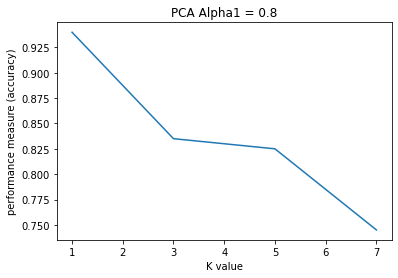

In [19]:
# Plot the performance measure against the K value
import matplotlib.pyplot as plt
  
# x axis values
x = [1,3,5,7]

# corresponding y axis values
y1 = [acc_1_k1,acc_1_k3,acc_1_k5,acc_1_k7]
y2 = [acc_2_k1,acc_2_k3,acc_2_k5,acc_2_k7]
y3 = [acc_3_k1,acc_3_k3,acc_3_k5,acc_3_k7]
y4 = [acc_4_k1,acc_4_k3,acc_4_k5,acc_4_k7]

# plotting the points 
plt.plot(x, y1)
  
# naming the x axis
plt.xlabel('K value')

# naming the y axis
plt.ylabel('performance measure (accuracy)')

# giving a title to my graph
plt.title('PCA Alpha1 = 0.8')
  
# function to show the plot
plt.show()


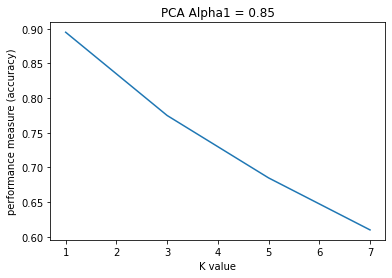

In [20]:

# plotting the points 
plt.plot(x, y2)
  
# naming the x axis
plt.xlabel('K value')

# naming the y axis
plt.ylabel('performance measure (accuracy)')

# giving a title to my graph
plt.title('PCA Alpha1 = 0.85')
  
# function to show the plot
plt.show()

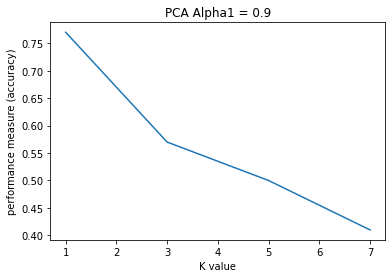

In [21]:

# plotting the points 
plt.plot(x, y3)
  
# naming the x axis
plt.xlabel('K value')

# naming the y axis
plt.ylabel('performance measure (accuracy)')

# giving a title to my graph
plt.title('PCA Alpha1 = 0.9')
  
# function to show the plot
plt.show()

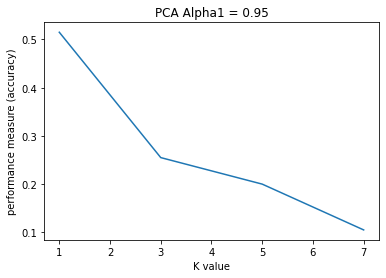

In [22]:

# plotting the points 
plt.plot(x, y4)
  
# naming the x axis
plt.xlabel('K value')

# naming the y axis
plt.ylabel('performance measure (accuracy)')

# giving a title to my graph
plt.title('PCA Alpha1 = 0.95')
  
# function to show the plot
plt.show()

# LDA [Mohammed Aiman]

In [23]:
#calculate over all mean
mu = np.mean(trainData,axis=0)
print(mu)

[85.6   85.725 86.125 ... 78.855 77.18  76.585]


In [24]:
#seperate each class and copmute each mean 
classes_k = [] #2d arrray 40p*5i
mean_k = [] #2d arrray 40p*1

counter=0
for i in range (0,200,5): #40 person
  class_n = trainData[i:i+5, :]
  classes_k.append(class_n)
  mean_k.append(np.mean(class_n,axis=0))


classes_k=np.array(classes_k)
mean_k=np.array(mean_k)
print(classes_k[0])
print(mean_k[0])

[[117 115 115 ...  53  46  68]
 [117 112 115 ...  82  82  80]
 [117 114 116 ...  85  89  91]
 [131 128 126 ...  41  40  35]
 [117 113 118 ...  78  85  82]]
[119.8 116.4 118.  ...  67.8  68.4  71.2]


In [25]:
#Compute the Scatter within S_K  <d*d>      # SW = sum((classes_k - mean_k)^2 )
#Compute Scatter between matrices  <d*d>   # SB = sum( n_k * (mean_k - mean_overall)^2 )

n_k=classes_k[0].shape[0]  #instances
n_features=classes_k[0].shape[1]   #Dims

SW = np.zeros((n_features, n_features))
SB = np.zeros((n_features, n_features)) 

for tclass,mean in zip(classes_k,mean_k):
  SW+=np.dot(np.array(tclass-mean).T,np.array(tclass-mean))
  SB += n_k * np.dot(np.array(mean-mu).T,np.array(mean-mu))


SW=np.array(SW)
SB=np.array(SB)


print(SW)
print("***********")
print(SB)

[[ 29185.6  28298.   28358.2 ...   3719.    5880.6   6768.4]
 [ 28298.   29600.4  28644.8 ...   4265.2   6569.2   7302. ]
 [ 28358.2  28644.8  30522.8 ...   4929.2   7265.    8167. ]
 ...
 [  3719.    4265.2   4929.2 ... 107181.6  46732.   32096. ]
 [  5880.6   6569.2   7265.  ...  46732.   59086.8  46714.6]
 [  6768.4   7302.    8167.  ...  32096.   46714.6  70138.4]]
***********
[[2.01818277e+09 2.01818277e+09 2.01818277e+09 ... 2.01818277e+09
  2.01818277e+09 2.01818277e+09]
 [2.01818277e+09 2.01818277e+09 2.01818277e+09 ... 2.01818277e+09
  2.01818277e+09 2.01818277e+09]
 [2.01818277e+09 2.01818277e+09 2.01818277e+09 ... 2.01818277e+09
  2.01818277e+09 2.01818277e+09]
 ...
 [2.01818277e+09 2.01818277e+09 2.01818277e+09 ... 2.01818277e+09
  2.01818277e+09 2.01818277e+09]
 [2.01818277e+09 2.01818277e+09 2.01818277e+09 ... 2.01818277e+09
  2.01818277e+09 2.01818277e+09]
 [2.01818277e+09 2.01818277e+09 2.01818277e+09 ... 2.01818277e+09
  2.01818277e+09 2.01818277e+09]]


In [26]:
#Compute the Eigenvalues and Eigenvectors of S^-1 B
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))
print(np.diag(eigval))
print("*****************")
print(eigvec)
print("*********")

[[-1.85910591e+20       +0.j         0.00000000e+00       +0.j
   0.00000000e+00       +0.j        ...  0.00000000e+00       +0.j
   0.00000000e+00       +0.j         0.00000000e+00       +0.j       ]
 [ 0.00000000e+00       +0.j        -1.59178624e+08       +0.j
   0.00000000e+00       +0.j        ...  0.00000000e+00       +0.j
   0.00000000e+00       +0.j         0.00000000e+00       +0.j       ]
 [ 0.00000000e+00       +0.j         0.00000000e+00       +0.j
   1.12442813e+07+10834416.8142969j ...  0.00000000e+00       +0.j
   0.00000000e+00       +0.j         0.00000000e+00       +0.j       ]
 ...
 [ 0.00000000e+00       +0.j         0.00000000e+00       +0.j
   0.00000000e+00       +0.j        ... -5.01825292e+01       +0.j
   0.00000000e+00       +0.j         0.00000000e+00       +0.j       ]
 [ 0.00000000e+00       +0.j         0.00000000e+00       +0.j
   0.00000000e+00       +0.j        ...  0.00000000e+00       +0.j
  -1.65049002e+01       +0.j         0.00000000e+00       +0.

In [27]:
# sort eigenvalues high to low
eigvec = eigvec.T
idxs = np.argsort(abs(eigval))[::-1]
eigval = eigval[idxs]
eigvec = eigvec[idxs]

In [28]:
# store first 39 eigenvectors <39*10304> projection matrix
U = eigvec[0:39] 

In [29]:
# project data
#Train data 
train_projected_data=np.dot(trainData, U.T)

#Test data
test_projected_data=np.dot(testData, U.T)

print(train_projected_data.shape[1] )  #Dims
print(train_projected_data[0].shape[0])

39
39


In [30]:
# Classification using KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


def KNN_classifier(n_neighbors , train_data,trainLabels,test_data):
  #Feature Scaling 
  scaler = StandardScaler()
  scaler.fit(train_projected_data.real)
  X_train = scaler.transform(train_data.real)
  X_test = scaler.transform(test_data.real)

  #Classification
  classifier_1 = KNeighborsClassifier(n_neighbors)
  classifier_1.fit(X_train, trainLabels)
  predeted_labels = classifier_1.predict(X_test)
  return predeted_labels


#Apply different K valuse 
#Knn=1
pred_1=KNN_classifier(1,train_projected_data,trainLabels,test_projected_data)

#Knn=3
pred_3=KNN_classifier(3,train_projected_data,trainLabels,test_projected_data)

#Knn=5
pred_5=KNN_classifier(5,train_projected_data,trainLabels,test_projected_data)

#Knn=7
pred_7=KNN_classifier(7,train_projected_data,trainLabels,test_projected_data)

# Calculate Accuracy 
from sklearn.metrics import accuracy_score
acc_1 = accuracy_score(testLabels, pred_1)
acc_3 = accuracy_score(testLabels, pred_3)
acc_5 = accuracy_score(testLabels, pred_5)
acc_7 = accuracy_score(testLabels, pred_7)
print(acc_1,acc_3,acc_5,acc_7)

0.645 0.63 0.61 0.595


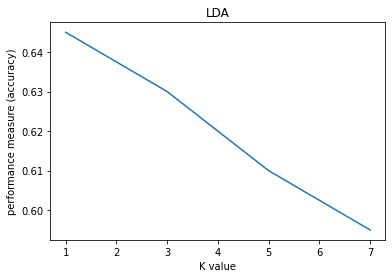

In [31]:
# Plot the performance measure against the K value
import matplotlib.pyplot as plt
  
# x axis values
x = [1,3,5,7]

# corresponding y axis values
y = [acc_1,acc_3,acc_5,acc_7]

# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('K value')

# naming the y axis
plt.ylabel('performance measure (accuracy)')

# giving a title to my graph
plt.title('LDA')
  
# function to show the plot
plt.show()

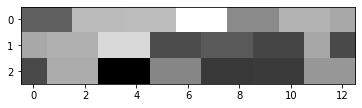

In [32]:
#plot the projected image

import matplotlib.pyplot as plt 
import numpy as np 
train_projected_data[0].reshape(1,39)
plt.imshow(np.array(train_projected_data[10].reshape(3,13).real), cmap="gray") 
plt.show()




```
# This is formatted as code
```

Compare vs Non-Face Images

In [33]:
# read the contour data set 

BASE = '/content/drive/MyDrive/nonFaces/'
filepaths = [] # Contains the absolute paths of all the image files
for ns_i in os.listdir(BASE): # The folders containing the files are labelled as s1, s2, etc
            filepaths.append(BASE + '/' + ns_i )

In [1]:
from PIL import Image
import matplotlib.pyplot as plt 
resized_images = []

for filepath in filepaths:
    #img= cv2.imread(filepath, 0)
    img = Image.open(filepath)
    resized_image = np.array( img.resize((92,112)) )
    resized_images.append(resized_image.flatten())

print(resized_images[0])
plt.imshow(resized_images[0], cmap="gray") 
plt.show()

resized_images = np.array(resized_images)
resized_images.shape

NameError: ignored